Visualize stock price trends over time

Calculate daily returns and assess volatility

Apply moving averages (e.g., 50-day, 200-day) to identify trends

Analyze trading volume patterns

Practice time series forecasting and financial modeling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
google = pd.read_csv('google_5yr_one.csv')

In [4]:
#checking info
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1255 non-null   object
 1   Close   1256 non-null   object
 2   High    1256 non-null   object
 3   Low     1256 non-null   object
 4   Open    1256 non-null   object
 5   Volume  1256 non-null   object
dtypes: object(6)
memory usage: 59.0+ KB


In [5]:
#drop NAN to avoid errors
google.dropna(inplace = True)

In [6]:
#cleaning first row out
google = google.iloc[1:]

In [7]:
#setting date to date type
google['Date'] = pd.to_datetime(google['Date'])

In [8]:
#changing date type to float
google[['Close', 'High', 'Low', 'Open', 'Volume']] = google[['Close', 'High', 'Low', 'Open', 'Volume']].astype('float')

In [9]:
google.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1254 entries, 2 to 1255
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1254 non-null   datetime64[ns]
 1   Close   1254 non-null   float64       
 2   High    1254 non-null   float64       
 3   Low     1254 non-null   float64       
 4   Open    1254 non-null   float64       
 5   Volume  1254 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 68.6 KB


In [10]:
#setting index as date
google.set_index('Date', inplace=True)

In [11]:
google

,Close,High,Low,Open,Volume
Date,,,,,
2020-06-05,71.658401,71.970910,70.046107,70.445200,42642000.0
2020-06-08,72.057487,72.105256,70.885091,70.974667,33878000.0
2020-06-09,72.258530,73.040793,71.774842,71.918162,33624000.0
2020-06-10,72.886528,73.288104,72.371990,72.727787,31762000.0
2020-06-11,69.761475,72.234651,69.587805,71.708662,47144000.0
...,...,...,...,...,...
2025-05-27,172.899994,173.169998,170.000000,170.160004,37995700.0
2025-05-28,172.360001,175.270004,171.910004,173.160004,34784000.0
2025-05-29,171.860001,174.419998,170.630005,174.000000,29373800.0


In [12]:
google.describe()

,Close,High,Low,Open,Volume
count,1254.000000,1254.000000,1254.000000,1254.000000,1.254000e+03
mean,127.388948,128.813130,125.938997,127.330701,3.212323e+07
std,31.561527,31.845049,31.304988,31.599696,1.355444e+07
min,67.802834,69.567407,67.260929,67.693363,9.312000e+06
25%,102.428802,103.694990,101.162343,102.250269,2.333245e+07
50%,128.475761,130.207476,127.043111,128.649929,2.883940e+07
75%,147.330498,148.959617,146.032832,147.534771,3.679900e+07
max,206.142593,206.811821,202.576693,203.156027,1.274901e+08


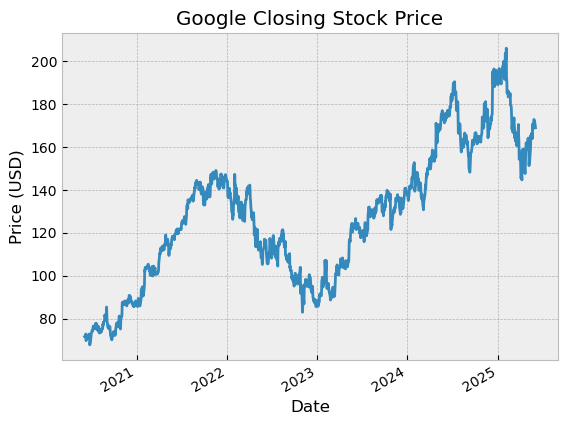

In [38]:
#visualising stock price over time

plt.style.use('bmh')
google['Close'].plot()
plt.title('Google Closing Stock Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

# Save the chart as an image file
plt.savefig('google_price.png', dpi=300, bbox_inches='tight')

plt.show()

In [14]:
google['Change'] = ((google['Close'])-(google['Open']))

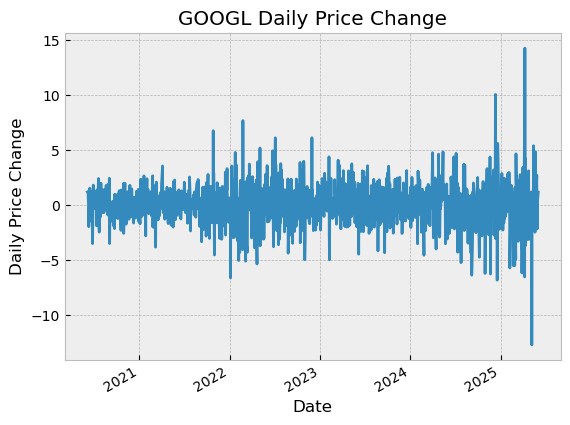

In [37]:
# Calculate and plot daily price change
google['Change'].plot(title="GOOGL Daily Price Change")
plt.xlabel("Date")
plt.ylabel("Daily Price Change")

# Save the chart as an image file
plt.savefig('google_volatility.png', dpi=300, bbox_inches='tight')

plt.show()


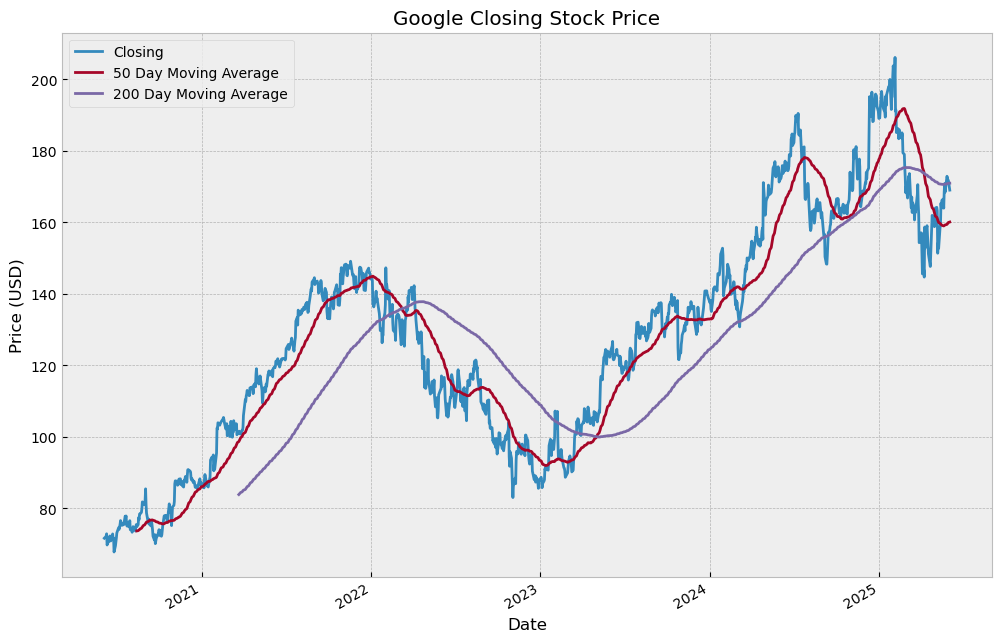

In [36]:
#Apply moving averages (e.g., 50-day, 200-day) to identify trends

google['MA_50'] = google['Close'].rolling(window=50).mean()
google['MA_200'] = google['Close'].rolling(window=200).mean()

plt.figure(figsize = (12,8))
google['Close'].plot(label = 'Closing')
google['MA_50'].plot(label = '50 Day Moving Average')
google['MA_200'].plot(label = '200 Day Moving Average')
plt.title('Google Closing Stock Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

# Save the chart as an image file
plt.savefig('google_moving_avg.png', dpi=300, bbox_inches='tight')

plt.show()

In [17]:
google

,Close,High,Low,Open,Volume,Change,MA_50,MA_200
Date,,,,,,,,
2020-06-05,71.658401,71.970910,70.046107,70.445200,42642000.0,1.213201,NaN,NaN
2020-06-08,72.057487,72.105256,70.885091,70.974667,33878000.0,1.082820,NaN,NaN
2020-06-09,72.258530,73.040793,71.774842,71.918162,33624000.0,0.340368,NaN,NaN
2020-06-10,72.886528,73.288104,72.371990,72.727787,31762000.0,0.158741,NaN,NaN
2020-06-11,69.761475,72.234651,69.587805,71.708662,47144000.0,-1.947188,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-05-27,172.899994,173.169998,170.000000,170.160004,37995700.0,2.739990,159.437601,170.798961
2025-05-28,172.360001,175.270004,171.910004,173.160004,34784000.0,-0.800003,159.599001,170.853541
2025-05-29,171.860001,174.419998,170.630005,174.000000,29373800.0,-2.139999,159.822801,170.897450


In [18]:
#sorting index by date and taking half year
this_year = google.sort_index(ascending=False).head(180)

In [19]:
#Analyze trading volume patterns

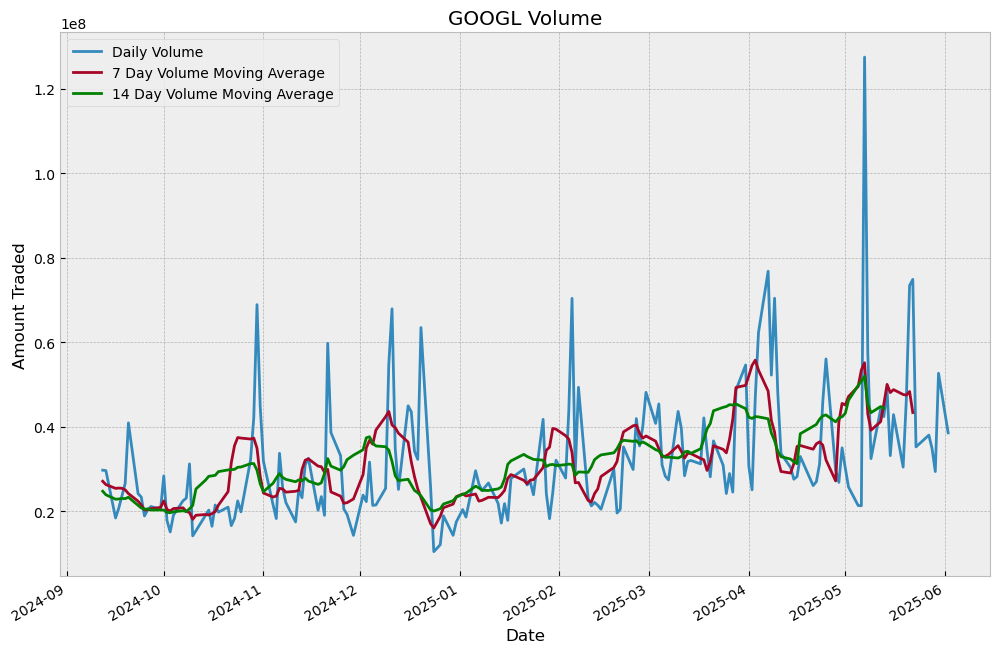

In [35]:
#volume moving averages for 7 days and 14 days
this_year['VMA_7'] = this_year['Volume'].rolling(window=7).mean()
this_year['VMA_14'] = this_year['Volume'].rolling(window=14).mean()

plt.figure(figsize = (12,8))
this_year['Volume'].plot(label = 'Daily Volume')
this_year['VMA_7'].plot(label = '7 Day Volume Moving Average')
this_year['VMA_14'].plot(label = '14 Day Volume Moving Average', color='green')
plt.title('GOOGL Volume')
plt.xlabel('Date')
plt.ylabel('Amount Traded')
plt.legend()

# Save the chart as an image file
plt.savefig('google_volume.png', dpi=300, bbox_inches='tight')

plt.show()

In [21]:
google

,Close,High,Low,Open,Volume,Change,MA_50,MA_200
Date,,,,,,,,
2020-06-05,71.658401,71.970910,70.046107,70.445200,42642000.0,1.213201,NaN,NaN
2020-06-08,72.057487,72.105256,70.885091,70.974667,33878000.0,1.082820,NaN,NaN
2020-06-09,72.258530,73.040793,71.774842,71.918162,33624000.0,0.340368,NaN,NaN
2020-06-10,72.886528,73.288104,72.371990,72.727787,31762000.0,0.158741,NaN,NaN
2020-06-11,69.761475,72.234651,69.587805,71.708662,47144000.0,-1.947188,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-05-27,172.899994,173.169998,170.000000,170.160004,37995700.0,2.739990,159.437601,170.798961
2025-05-28,172.360001,175.270004,171.910004,173.160004,34784000.0,-0.800003,159.599001,170.853541
2025-05-29,171.860001,174.419998,170.630005,174.000000,29373800.0,-2.139999,159.822801,170.897450


In [22]:
#Practice time series forecasting and financial modeling
#importing ARIMA to run statistical model
from statsmodels.tsa.arima.model import ARIMA

C:\Users\james_6mutpus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\james_6mutpus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\james_6mutpus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\james_6mutpus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  r

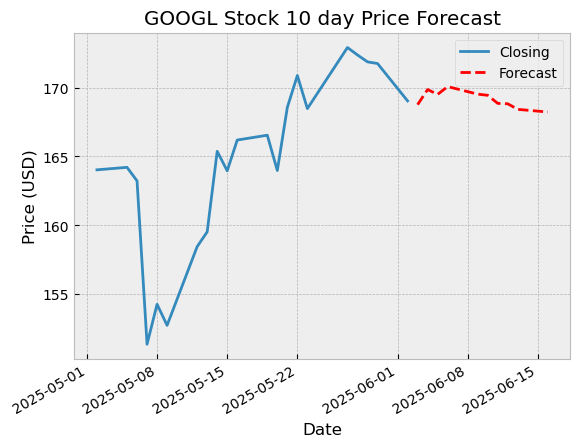

In [31]:

# Fit ARIMA model
model = ARIMA(google['Close'], order=(21, 1, 0))
model_fit = model.fit()

# Forecast next 10 days
forecast = model_fit.forecast(steps=10)

# Create future date range
last_date = google.index[-1]
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=10, freq='B')

# Assign the new datetime index to the forecast
forecast.index = forecast_index

#Define last 3 weeks
last3_weeks = google.sort_index().tail(21)

# Plot actual and forecast
last3_weeks['Close'].plot(label='Closing')
forecast.plot(label='Forecast', color='red', linestyle='--')
plt.title('GOOGL Stock 10 day Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

# Save the chart as an image file
plt.savefig('google_forecast.png', dpi=300, bbox_inches='tight')

plt.show()
